In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/ToyotaCorolla - MLR.csv")

In [3]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


# ***Performing EDA on the given dataset***

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [5]:
data.shape

(1436, 11)

In [6]:
data.nunique()

,0
Price,236
Age_08_04,77
KM,1263
Fuel_Type,3
HP,12
Automatic,2
cc,13
Doors,4
Cylinders,1
Gears,4


In [7]:
data.drop(columns=['Cylinders'], inplace=True)
data.head(10)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170
5,12950,32,61000,Diesel,90,0,2000,3,5,1170
6,16900,27,94612,Diesel,90,0,2000,3,5,1245
7,18600,30,75889,Diesel,90,0,2000,3,5,1245
8,21500,27,19700,Petrol,192,0,1800,3,5,1185
9,12950,23,71138,Diesel,69,0,1900,3,5,1105


In [8]:
data.shape

(1436, 10)

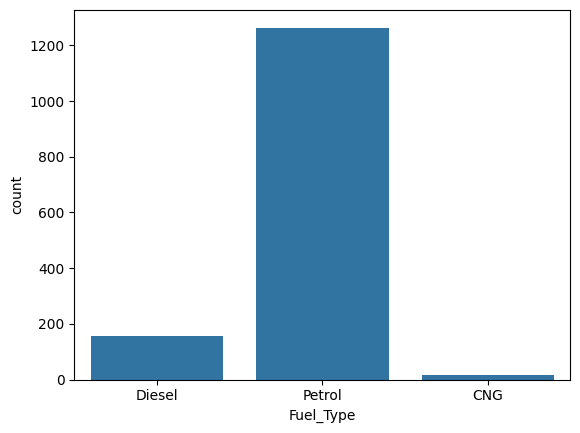

In [9]:
#graph for fuel type

import matplotlib.pyplot as plt
sns.countplot(x='Fuel_Type', data=data)
plt.show()


**We can clearly see petrol fuel type cars are more as compared to diesel and CNG**

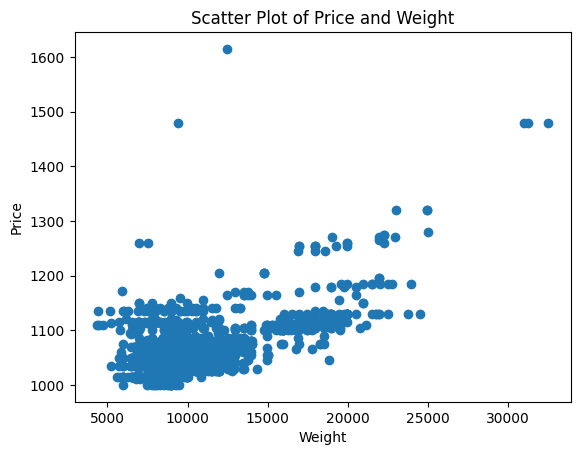

In [10]:
#scatter plot for price and weight

import matplotlib.pyplot as plt
#scatter plot for price and weight
plt.scatter(data['Price'], data['Weight'])
plt.xlabel("Weight")
plt.ylabel("Price")
plt.title("Scatter Plot of Price and Weight")
plt.show()


**Weight is somewhat related to price of the cars and we can clearly see presence of outliers in both the columns.**

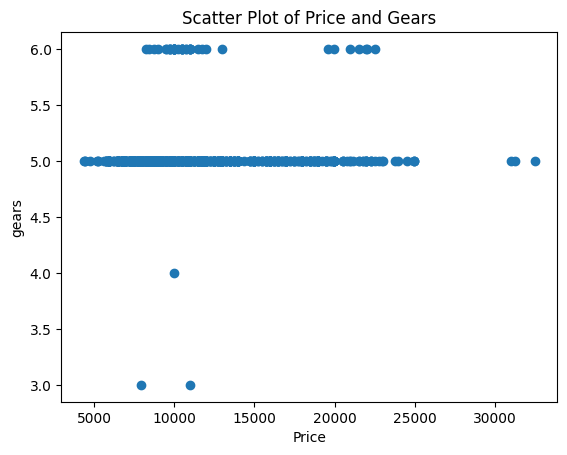

In [11]:
import matplotlib.pyplot as plt
#scatter plot for price and weight
plt.scatter(data['Price'], data['Gears'])
plt.xlabel("Price")
plt.ylabel("gears")
plt.title("Scatter Plot of Price and Gears")
plt.show()

**Numbers of Gears in the cars doesn't affect the prices of cars**

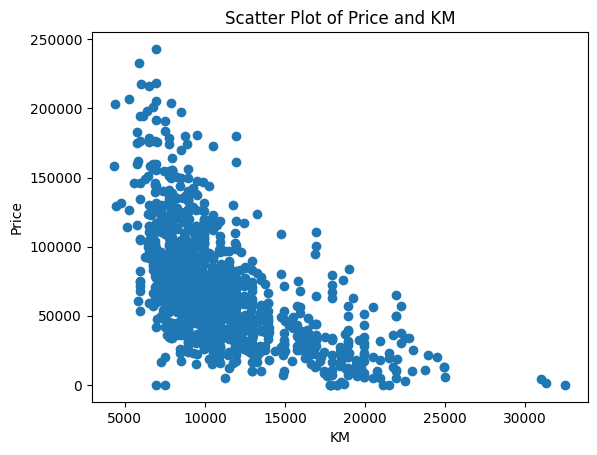

In [12]:
#km and price plot

import matplotlib.pyplot as plt
#scatter plot for price and km
plt.scatter(data['Price'], data['KM'])
plt.xlabel("KM")
plt.ylabel("Price")
plt.title("Scatter Plot of Price and KM")
plt.show()


**As the KM increases price descreases, KM is inversely proportionol to Price.**

---



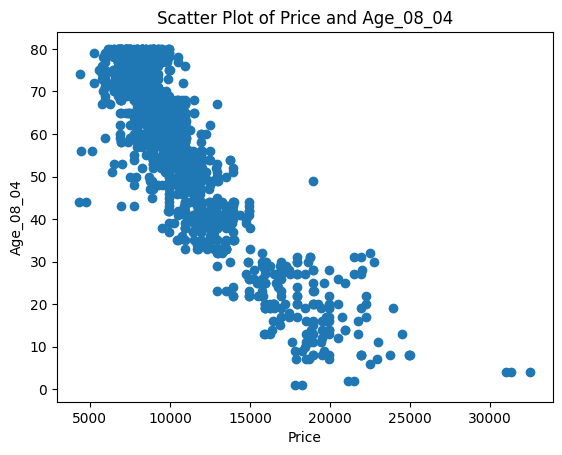

In [13]:
# Age_08_04 and price plot

import matplotlib.pyplot as plt
#scatter plot for price and Age_08_04
plt.scatter(data['Price'], data['Age_08_04'])
plt.xlabel("Price")
plt.ylabel("Age_08_04")
plt.title("Scatter Plot of Price and Age_08_04")
plt.show()


**From this scatter plot we can easily conclude that as the age of car increases value of the car decreases. Age is inversely correlated to price of the car**

## *Outliers detection and treatmen*

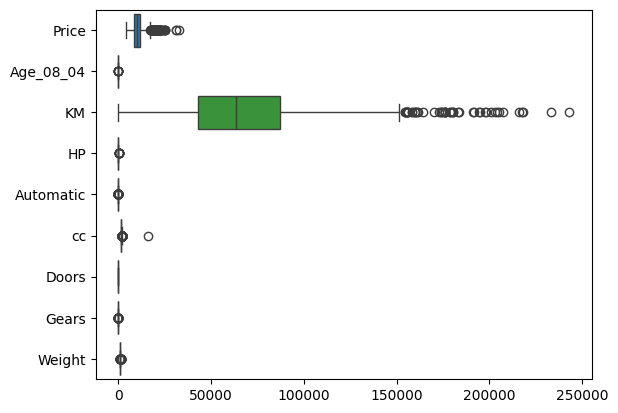

In [14]:
# simply we can draw boxplot to check whether outliers are present or not.
sns.boxplot(data, orient = "h")
plt.show()

**Clearily we can see outliers present in our data, but all are not relevant, now we will treat the outliers that affects our model.**

In [15]:
Q1 = data['KM'].quantile(0.25)
Q3 = data['KM'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
data['KM'] = np.where(data['KM'] < lower_limit, lower_limit, data['KM'])
data['KM'] = np.where(data['KM'] > upper_limit, upper_limit, data['KM'])

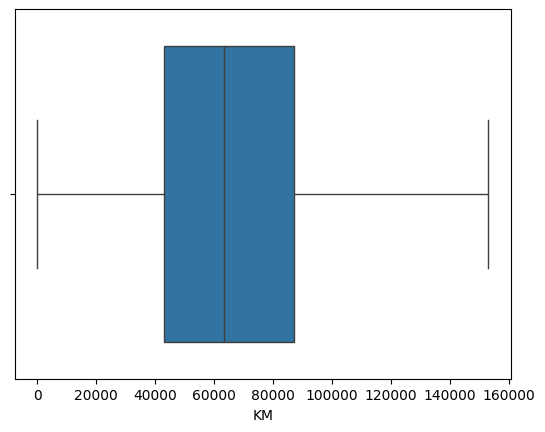

In [16]:
sns.boxplot(data["KM"], orient = "h")
plt.show()

In [17]:
Q1 = data['cc'].quantile(0.25)
Q3 = data['cc'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
data['cc'] = np.where(data['cc'] < lower_limit, lower_limit, data['cc'])
data['cc'] = np.where(data['cc'] > upper_limit, upper_limit, data['cc'])

In [18]:
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
data['Price'] = np.where(data['Price'] < lower_limit, lower_limit, data['Price'])
data['Price'] = np.where(data['Price'] > upper_limit, upper_limit, data['Price'])

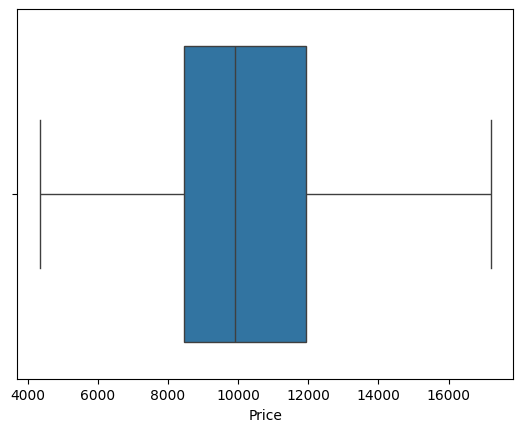

In [19]:
sns.boxplot(data["Price"], orient = "h")
plt.show()

In [20]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500.0,23,46986.0,Diesel,90,0,1900.0,3,5,1165
1,13750.0,23,72937.0,Diesel,90,0,1900.0,3,5,1165
2,13950.0,24,41711.0,Diesel,90,0,1900.0,3,5,1165
3,14950.0,26,48000.0,Diesel,90,0,1900.0,3,5,1165
4,13750.0,30,38500.0,Diesel,90,0,1900.0,3,5,1170


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Fuel_Type']=le.fit_transform(data['Fuel_Type'])
data.head(10)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500.0,23,46986.0,1,90,0,1900.0,3,5,1165
1,13750.0,23,72937.0,1,90,0,1900.0,3,5,1165
2,13950.0,24,41711.0,1,90,0,1900.0,3,5,1165
3,14950.0,26,48000.0,1,90,0,1900.0,3,5,1165
4,13750.0,30,38500.0,1,90,0,1900.0,3,5,1170
5,12950.0,32,61000.0,1,90,0,1900.0,3,5,1170
6,16900.0,27,94612.0,1,90,0,1900.0,3,5,1245
7,17200.0,30,75889.0,1,90,0,1900.0,3,5,1245
8,17200.0,27,19700.0,2,192,0,1800.0,3,5,1185
9,12950.0,23,71138.0,1,69,0,1900.0,3,5,1105


In [22]:
data.shape

(1436, 10)

In [23]:
data.corr()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
Price,1.000000,-0.895547,-0.608832,0.020635,0.284130,0.035415,0.132106,0.184211,0.052827,0.493970
Age_08_04,-0.895547,1.000000,0.532115,0.080261,-0.156622,0.031717,-0.139565,-0.148359,-0.005364,-0.470253
KM,-0.608832,0.532115,1.000000,-0.394674,-0.315827,-0.081882,0.255855,-0.037677,0.019974,-0.052024
Fuel_Type,0.020635,0.080261,-0.394674,1.000000,0.409476,0.069718,-0.599662,-0.026935,0.069655,-0.505303
HP,0.284130,-0.156622,-0.315827,0.409476,1.000000,0.013144,0.125431,0.092424,0.209477,0.089614
Automatic,0.035415,0.031717,-0.081882,0.069718,0.013144,1.000000,-0.059519,-0.027654,-0.098555,0.057249
cc,0.132106,-0.139565,0.255855,-0.599662,0.125431,-0.059519,1.000000,0.139616,0.051949,0.631882
Doors,0.184211,-0.148359,-0.037677,-0.026935,0.092424,-0.027654,0.139616,1.000000,-0.160141,0.302618
Gears,0.052827,-0.005364,0.019974,0.069655,0.209477,-0.098555,0.051949,-0.160141,1.000000,0.020613
Weight,0.493970,-0.470253,-0.052024,-0.505303,0.089614,0.057249,0.631882,0.302618,0.020613,1.000000


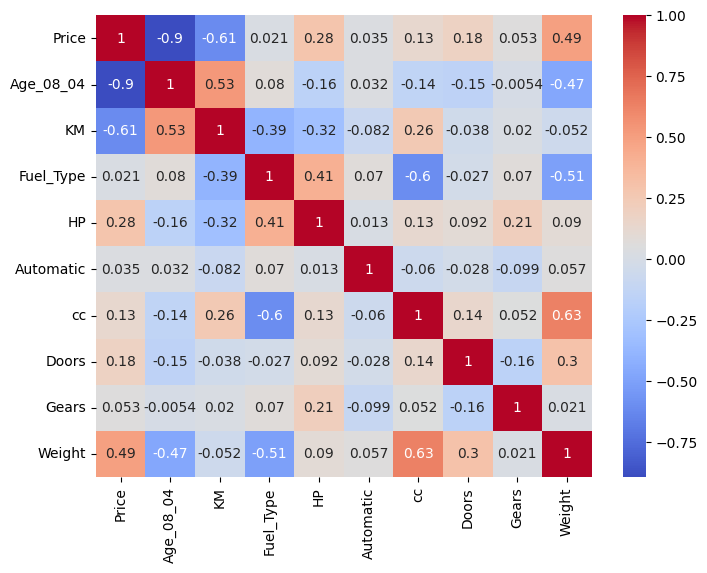

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot = True, cmap ="coolwarm")
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
new_data = scaler.fit_transform(data)

# Convert the scaled data back to a DataFrame
new_data = pd.DataFrame(new_data, columns=data.columns)

# Display the first few rows of the scaled data
new_data.head()


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,1.006237,-1.771966,-0.593750,-2.337868,-0.768042,-0.242893,2.021383,-1.085139,-0.140425,1.758561
1,1.090108,-1.771966,0.153546,-2.337868,-0.768042,-0.242893,2.021383,-1.085139,-0.140425,1.758561
2,1.157205,-1.718184,-0.745652,-2.337868,-0.768042,-0.242893,2.021383,-1.085139,-0.140425,1.758561
3,1.492688,-1.610620,-0.564551,-2.337868,-0.768042,-0.242893,2.021383,-1.085139,-0.140425,1.758561
4,1.090108,-1.395491,-0.838117,-2.337868,-0.768042,-0.242893,2.021383,-1.085139,-0.140425,1.853577


# ***MLR IMPLEMENTATION***

In [26]:
x = new_data.drop(columns=["Price"])
y = new_data["Price"]

In [27]:
x.head()

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,-1.771966,-0.593750,-2.337868,-0.768042,-0.242893,2.021383,-1.085139,-0.140425,1.758561
1,-1.771966,0.153546,-2.337868,-0.768042,-0.242893,2.021383,-1.085139,-0.140425,1.758561
2,-1.718184,-0.745652,-2.337868,-0.768042,-0.242893,2.021383,-1.085139,-0.140425,1.758561
3,-1.610620,-0.564551,-2.337868,-0.768042,-0.242893,2.021383,-1.085139,-0.140425,1.758561
4,-1.395491,-0.838117,-2.337868,-0.768042,-0.242893,2.021383,-1.085139,-0.140425,1.853577


In [28]:
y.head()

,Price
0,1.006237
1,1.090108
2,1.157205
3,1.492688
4,1.090108


In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
# implement MLR model on the new data set

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

In [31]:
# predicting the training and test score now using MLR

# Predict on the training and test sets
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

# Calculate R-squared scores
train_score = lr.score(x_train, y_train)
test_score = lr.score(x_test, y_test)

print("Training score:", train_score)
print("Test score:", test_score)


Training score: 0.8591531766376557
Test score: 0.8417770954345618


# **Lasso Implementation**

In [32]:
#Applying Lasso method model.

from sklearn.linear_model import Lasso

# Create a Lasso regression object
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)



Lasso(alpha=0.1)

In [33]:
# Predict on the training and test sets
y_train_pred_lasso = lasso.predict(x_train)
y_test_pred_lasso = lasso.predict(x_test)

# Calculate R-squared scores for Lasso
train_score_lasso = lasso.score(x_train, y_train)
test_score_lasso = lasso.score(x_test, y_test)

print("Lasso Training score:", train_score_lasso)
print("Lasso Test score:", test_score_lasso)

Lasso Training score: 0.8289707912170003
Lasso Test score: 0.8257283119194898


# **Ridge Implementation**

In [34]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.1)

In [35]:
y_pred = ridge_model.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R squared score:", r2_score(y_test, y_pred))

Mean squared error: 0.15299922840161428
R squared score: 0.8417770820416258


**MLR : 84% ACCURACY**

**LASSO : 82% ACCURACY**

**RIDGE : 84% ACCURACY**
